# Linear regression

## Monday January 25, 2021

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f



In [1]:
# import standard libraries
import pandas as pd                                    # data frames  
import numpy as np                                     # matrices 
import matplotlib.pyplot as plt                        # plotting 
import seaborn as sns; sns.set()                       # better plotting
from sklearn.model_selection import train_test_split   # training-vs-testing
from sklearn.linear_model import LinearRegression      # the linear regression model
from sklearn import metrics
%matplotlib inline

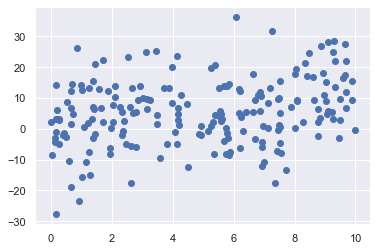

In [2]:
# first, lets try a synthetic dataset: linear plus noise
rng = np.random.RandomState(1)          # initialise random number generator "rng"
noise = 10                              # magnitude of noise
num = 200                                # number of observations
x = 10 * rng.rand(num)                  # create a dataset of num "x" values. Uniformly distributed 0-10.
y = 1 * x + noise*rng.randn(num)         # y vs x: slope of 1, with normally distributed noise with standard dev "noise"
plt.scatter(x,y)

In [5]:
x

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00, 4.19194514e+00, 6.85219500e+00,
       2.04452250e+00, 8.78117436e+00, 2.73875932e-01, 6.70467510e+00,
       4.17304802e+00, 5.58689828e+00, 1.40386939e+00, 1.98101489e+00,
       8.00744569e+00, 9.68261576e+00, 3.13424178e+00, 6.92322616e+00,
       8.76389152e+00, 8.94606664e+00, 8.50442114e-01, 3.90547832e-01,
       1.69830420e+00, 8.78142503e+00, 9.83468338e-01, 4.21107625e+00,
       9.57889530e+00, 5.33165285e+00, 6.91877114e+00, 3.15515631e+00,
       6.86500928e+00, 8.34625672e+00, 1.82882773e-01, 7.50144315e+00,
       9.88861089e+00, 7.48165654e+00, 2.80443992e+00, 7.89279328e+00,
       1.03226007e+00, 4.47893526e+00, 9.08595503e+00, 2.93614148e+00,
       2.87775339e+00, 1.30028572e+00, 1.93669579e-01, 6.78835533e+00,
       2.11628116e+00, 2.65546659e+00, 4.91573159e+00, 5.33625451e-01,
      

In [6]:
# x is originally a row vector
print(x)

print(" ")

# we can transform to a column vector
print(x[:,np.newaxis])

[4.17022005e+00 7.20324493e+00 1.14374817e-03 3.02332573e+00
 1.46755891e+00 9.23385948e-01 1.86260211e+00 3.45560727e+00
 3.96767474e+00 5.38816734e+00 4.19194514e+00 6.85219500e+00
 2.04452250e+00 8.78117436e+00 2.73875932e-01 6.70467510e+00
 4.17304802e+00 5.58689828e+00 1.40386939e+00 1.98101489e+00
 8.00744569e+00 9.68261576e+00 3.13424178e+00 6.92322616e+00
 8.76389152e+00 8.94606664e+00 8.50442114e-01 3.90547832e-01
 1.69830420e+00 8.78142503e+00 9.83468338e-01 4.21107625e+00
 9.57889530e+00 5.33165285e+00 6.91877114e+00 3.15515631e+00
 6.86500928e+00 8.34625672e+00 1.82882773e-01 7.50144315e+00
 9.88861089e+00 7.48165654e+00 2.80443992e+00 7.89279328e+00
 1.03226007e+00 4.47893526e+00 9.08595503e+00 2.93614148e+00
 2.87775339e+00 1.30028572e+00 1.93669579e-01 6.78835533e+00
 2.11628116e+00 2.65546659e+00 4.91573159e+00 5.33625451e-01
 5.74117605e+00 1.46728575e+00 5.89305537e+00 6.99758360e+00
 1.02334429e+00 4.14055988e+00 6.94400158e+00 4.14179270e+00
 4.99534589e-01 5.358964

## compute mean, variance, covariance, correlation, etc.
https://machinelearningmastery.com/introduction-to-expected-value-variance-and-covariance/

In [7]:
from numpy import mean, var, cov, corrcoef, sqrt       # routines to compute statistics
print("mean of x: ", mean(x))
print("mean of y: ",mean(y),"\n")
print("variance of x: ", var(x))
print("variance of y: ", var(y),"\n")
print("standard deviation: ", sqrt(var(x)),"\n")
print("covariance of x with itself:\n",cov(x,x),"\n")
print("covariance of x with y:\n",cov(x,y),"\n")
print("correlation coefficient:\n", corrcoef(x,y))

mean of x:  4.853584887583476
mean of y:  5.507134205661303 

variance of x:  9.333883773335415
variance of y:  113.6247084269839 

standard deviation:  3.055140548867665 

covariance of x with itself:
 [[9.38078771 9.38078771]
 [9.38078771 9.38078771]] 

covariance of x with y:
 [[  9.38078771   8.82106923]
 [  8.82106923 114.19568686]] 

correlation coefficient:
 [[1.         0.26951114]
 [0.26951114 1.        ]]


## are these values what you expected?

## linear regression from sklearn

In [8]:
from sklearn.linear_model import LinearRegression   # import the LinearRegression object class
model = LinearRegression(fit_intercept = True)      # define "model" as a LinearRegression object
model.fit(x[:, np.newaxis], y)                      # fit the model to the input dataset

print("Model slope: ", model.coef_[0])
print("model intercept: ", model.intercept_)

Model slope:  0.940333531112464
model intercept:  0.9431455897658418


Note that the estimated slope is not necessarily close to the "true" slope we used when creating the synthetic datset.  And while we expect an intercept of 0, we are allowing the model to find it as a fit parameter.

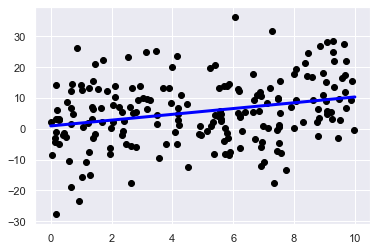

In [9]:
# look at the result graphically
xfit = np.linspace(0,10,1000)       #1000 equally spaced numbers betweeen 0 and 10
yfit = model.predict(xfit[:, np.newaxis])    # linear fit applied to these numbers

plt.scatter(x,y, color='black')
plt.plot(xfit,yfit, color='blue', linewidth=3)

## go back and try some other noise values and/or number of points, and see how 
(1) correlation and covariance depend on noise

(2) accuracy of estimated slope depends on number of points

## polynomial fitting: y = a0 + a1*x + a2*x^2 + a3*x^3

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(20), LinearRegression())

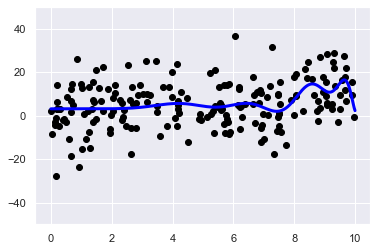

In [11]:
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.scatter(x,y, color="black")
plt.ylim(-50,50)
plt.plot(xfit, yfit, color='blue', linewidth=3)

In [ ]:
## think about how this kind of fitting can go wring.

## use the "diabetes" dataset as a test
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

## what is the diabetes dataset

Ten baseline variables (age, sex, body mass index, average blood pressure, and six blood serum measurements) were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.
https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/diabetes.rst

The dataset in scikit-learn is standarized (zero mean and unit L2 norm).
cf http://www.stanford.edu/~hastie/Papers/LARS/

In [13]:
print("shape: ",diabetes_X.shape)
diabetes_X

shape:  (442, 10)


array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [87]:
diabetes_y.size

442

Coefficients: 
 [981.65543614]
Mean squared error: 4150.68
Coefficient of determination: 0.19


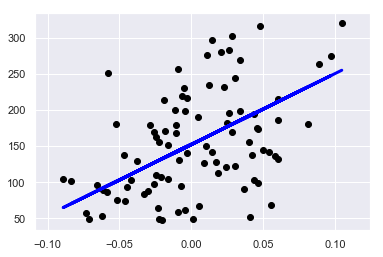

In [227]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# first lets try  using just one feature (the feature indexed "2" is the third feature: "body mass index")
X = diabetes_X[:, np.newaxis, 2]

# split into train and test
# use 80% of the data for training, 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, diabetes_y, test_size=0.2, random_state=0)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()

In [228]:
# what is the correlation coefficient between BMI and outcome?
# note that correlation can be taken only between vectors of the same size and shape

print("X_train.shape",X_train.shape)
print("y_train.shape",y_train.shape)

X_train.shape (353, 1)
y_train.shape (353,)


In [229]:
# so to compare them we need to convert a matrix with one column (X_train) into a vector (to be like y_train)
x2_train = X_train[:,0]
x2_train.shape
corrcoef(x2_train, y_train)

array([[1.        , 0.61288728],
       [0.61288728, 1.        ]])

In [159]:
# what about the rest of the data?
# lets convert it from a numpy array to a data frame
# many ways to do this 
# https://stackoverflow.com/questions/20763012/creating-a-pandas-dataframe-from-a-numpy-array-how-do-i-specify-the-index-colum


In [154]:
# note: if you end a line without completing the syntax, it will be automatically continued
df1 = pd.DataFrame({'Age': diabetes_X[:, 0], 'Sex': diabetes_X[:, 1],'BMI': diabetes_X[:, 2],
                   'BP': diabetes_X[:, 3]})

df2 = pd.DataFrame({'Age': diabetes_X[:, 0], 'Sex': diabetes_X[:, 1],'BMI': diabetes_X[:, 2],
                   'BP': diabetes_X[:, 3], 'Serum1': diabetes_X[:, 4], 'Serum2': diabetes_X[:, 5],
                  'Serum3': diabetes_X[:, 6], 'Serum4': diabetes_X[:, 7], 'Serum5': diabetes_X[:, 8],
                  'Serum6': diabetes_X[:, 9]})

dfy = pd.DataFrame({"Outcome":diabetes_y})

#age, sex, body mass index, average blood pressure, and six blood serum measurements

In [231]:
df2.tail()

,Age,Sex,BMI,BP,Serum1,Serum2,Serum3,Serum4,Serum5,Serum6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064


In [156]:
dfy.head()

,Outcome
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [158]:
# with pandas comes quick summary stats
dfy.describe()

,Outcome
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


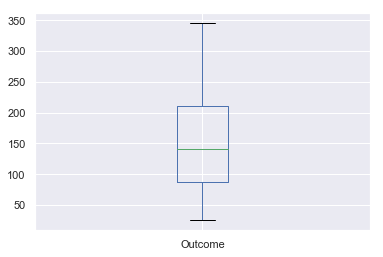

In [232]:
dfy.boxplot()

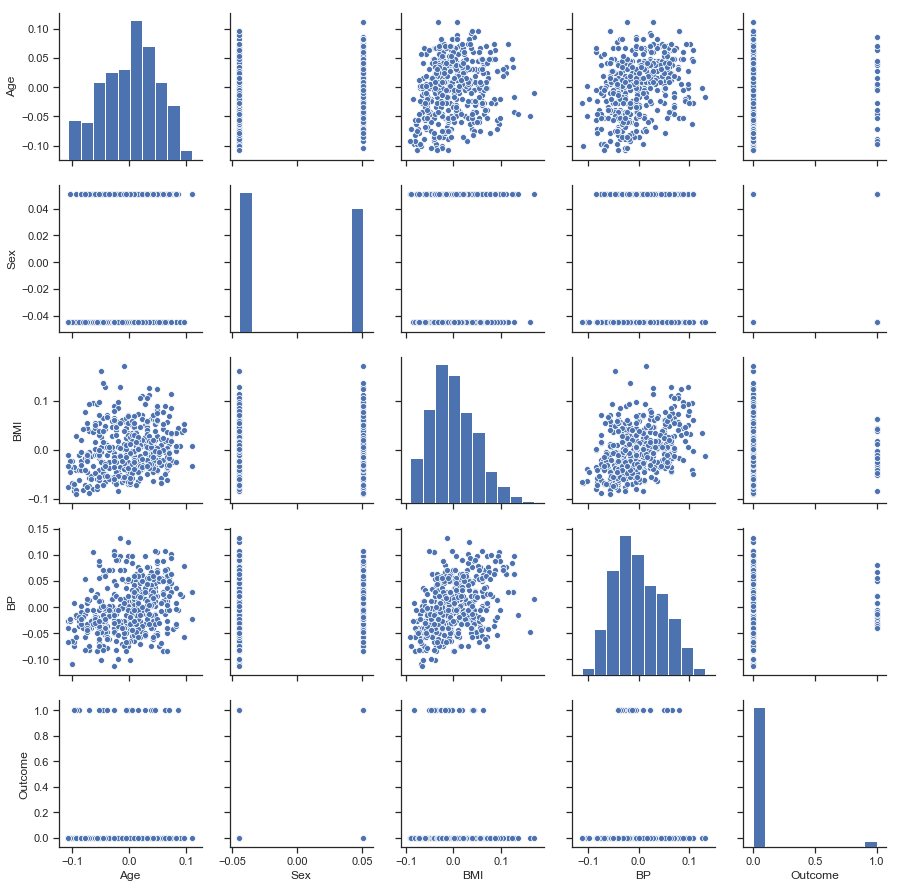

In [233]:
#seaborn has many visualization capabilities
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df1)

# Iris dataset (E Anderson, RA Fisher)
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.
https://en.wikipedia.org/wiki/Iris_flower_data_set

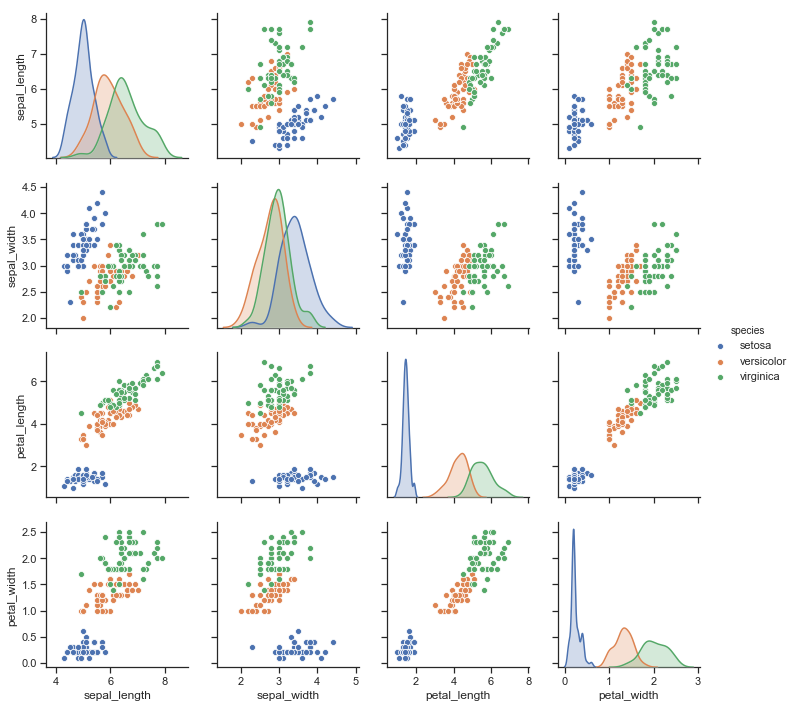

In [182]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species")

In [163]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [234]:
# back to the diabetes dataset
print(len(diabetes_y))
status = np.zeros(len(diabetes_y))

for i in range(len(y)):
    if (y[i] < 152): status[i]="1"

442


In [181]:
df1['Outcome'] = status 
df1.head()

,Age,Sex,BMI,BP,Outcome
0,0.038076,0.050680,0.061696,0.021872,1.0
1,-0.001882,-0.044642,-0.051474,-0.026328,1.0
2,0.085299,0.050680,0.044451,-0.005671,1.0
3,-0.089063,-0.044642,-0.011595,-0.036656,1.0
4,0.005383,-0.044642,-0.036385,0.021872,1.0


/Users/drokhsar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/drokhsar/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/drokhsar/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/drokhsar/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, *

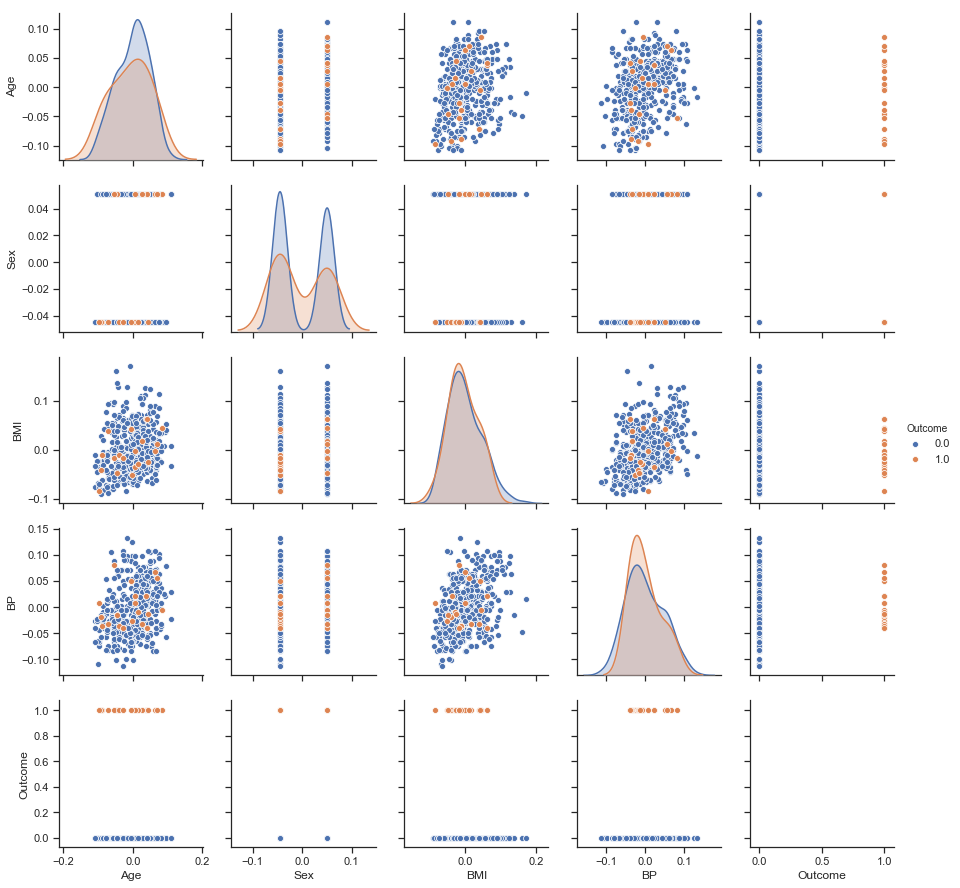

In [235]:
sns.pairplot(df1, hue="Outcome")

# Multiple linear regression


In [236]:
# split into train and test
# use 80% of the data for training, 20% for test

X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=0)

In [237]:
# instantiate the LinearRegression class
# execute the "fit" method on the test data

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [238]:
#To retrieve the intercept from the LinearRegression we just did:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

152.5381335195406
[ -35.55683674 -243.1692265   562.75404632  305.47203008 -662.78772128
  324.27527477   24.78193291  170.33056502  731.67810787   43.02846824]


In [239]:
# predict the y-values for the text set.
y_pred = regressor.predict(X_test)

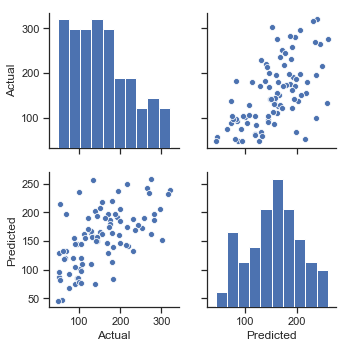

In [240]:
#compare the observed values with the predicted values for the text data
df_pred_test = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
sns.pairplot(df_pred_test)

In [193]:
# evaluate using metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 46.1742024187542
Mean Squared Error: 3424.3166882137334
Root Mean Squared Error: 58.51766133582009
